In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML Lab/Weak 5 24.09/IRIS.csv')


In [ ]:
#df = pd.read_csv("IRIS.csv") #irish of an eye

In [5]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
X = df.drop('species', axis=1)
y = df['species']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler() #get the value into a range
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [12]:
coefficients = log_reg.coef_ #logistic regration algo
labels = X.columns

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for coef, label, color in zip(coefficients, log_reg.classes_, colors):
    ax.bar(labels, coef, label=label, alpha=0.5, color=color)
ax.set_title('Logistic Regression Coefficients per Class')
ax.set_ylabel('Coefficient Value')
ax.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_pred_dt = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

accuracy_dt

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=decision_tree.classes_, rounded=True)
plt.show()

1.0


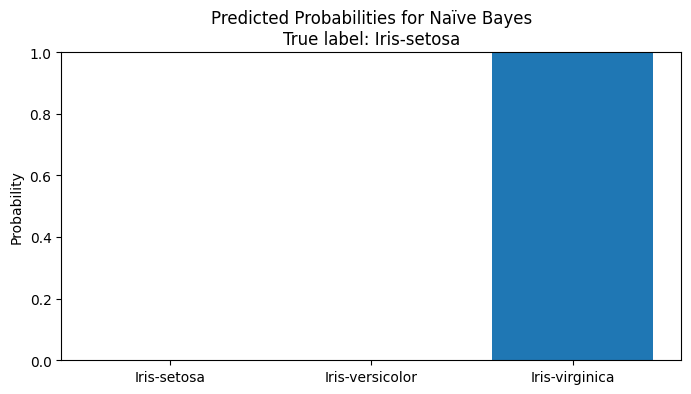

In [13]:
from sklearn.naive_bayes import GaussianNB #nab bious

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_nb))

sample_index = 5
sample_features = X_test.iloc[sample_index]
sample_true_label = y_test.iloc[sample_index]
sample_predicted_probabilities = nb.predict_proba([sample_features])

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(nb.classes_, sample_predicted_probabilities[0])
ax.set_title(f"Predicted Probabilities for Naïve Bayes\nTrue label: {sample_true_label}")
ax.set_ylabel('Probability')
ax.set_ylim(0, 1)

plt.show()


In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X_train_subset = X_train.iloc[:, :2].values
y_train_subset = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values

# Initialize and fit the SVM model
svm = SVC(kernel='linear', C=1.0, decision_function_shape='ovo')
svm.fit(X_train_subset, y_train_subset)

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_subset, y_train_subset, clf=svm, legend=2)
plt.title(f"SVM with {kernel} kernel and C=1.0")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #combining multipe algo

In [ ]:
def visualize_random_forest_tree(random_forest_model, tree_index=0):
    single_tree = random_forest_model.estimators_[tree_index]

    plt.figure(figsize=(20,10))
    plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
    plt.title(f"Decision Tree from Random Forest: Tree {tree_index + 1}")
    plt.show()

In [ ]:
def plot_feature_importances(random_forest_model):
    importances = random_forest_model.feature_importances_
    indices = np.argsort(importances)


    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances in Random Forest')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [ ]:
def evaluate_random_forest(max_depth=None, n_estimators=100):

    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)


    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest with max_depth={max_depth}, n_estimators={n_estimators}: Accuracy = {accuracy:.2f}")
    visualize_random_forest_tree(rf, tree_index=0)
    plot_feature_importances(rf)

In [ ]:
evaluate_random_forest(max_depth=3, n_estimators=100)
evaluate_random_forest(max_depth=5, n_estimators=100)  # None implies no limit on depth
evaluate_random_forest(max_depth=None, n_estimators=200)